# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

las acciones que planeas realizar.]
    El proposito general del proyecto es verificar cual de los 2planes existentes de prepago, para los clientes, genera mas ingresos, para proporcionar al departamento de marketing el analisis adecuado de los datos y estos puedan diseñar las estrategias necesarias para aunmetar los ingresos para la empresa.
    Para ello nesecito revisar las bases de datos porporcionadas, conocer de manera general su contenido, para implemetar los cambios, correcciones y/o eliminaciones o creacion de nueva informacion en base a los datos encontrados para poder procesar y analizar segun se requiera y poder proporcionar los datos necesarios para que la empresa se encargue de diseñar las estrategias necesarias par aumentar sus ingresos
[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
pd.read_csv('/datasets/megaline_calls.csv')
import pandas as pd
pd.read_csv('/datasets/megaline_internet.csv')
import pandas as pd
pd.read_csv('/datasets/megaline_messages.csv')
import pandas as pd
pd.read_csv('/datasets/megaline_plans.csv')
import pandas as pd
pd.read_csv('/datasets/megaline_users.csv')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
import pandas as pd
df_calls = pd.read_csv('/datasets/megaline_calls.csv')

import pandas as pd
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

import pandas as pd
df_messages = pd.read_csv('/datasets/megaline_messages.csv')

import pandas as pd
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

import pandas as pd
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
df_users.info()
print()
df_calls.info()
print()
df_messages.info()
print()
df_internet.info()
print()
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

<class 'pandas.core.frame

In [4]:
print(df_users.sort_values(by='churn_date'))

     user_id  first_name   last_name  age  \
246     1246      Stevie       Moran   69   
363     1363      Sandee        Lott   33   
441     1441      Piedad       Myers   23   
414     1414  Georgianne     Herring   30   
22      1022          Bo        Snow   73   
..       ...         ...         ...  ...   
495     1495       Fidel      Sharpe   67   
496     1496       Ariel    Shepherd   49   
497     1497       Donte     Barrera   49   
498     1498        Scot  Williamson   51   
499     1499       Shena     Dickson   37   

                                          city    reg_date      plan  \
246    Tampa-St. Petersburg-Clearwater, FL MSA  2018-01-09  ultimate   
363            Seattle-Tacoma-Bellevue, WA MSA  2018-01-05  ultimate   
441      Atlanta-Sandy Springs-Roswell, GA MSA  2018-03-08  ultimate   
414                     Urban Honolulu, HI MSA  2018-03-03      surf   
22   New York-Newark-Jersey City, NY-NJ-PA MSA  2018-04-20      surf   
..                         

## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# Imprime una muestra de los datos para las tarifas
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
en general la informacion parece completa en su mayoria, podriamos cambiar el user_id a object, ya que es un dato que no requiere de hacer operaciones, solo se encontraron valores nulos en el df de usuarios que habra que cambiar a desconocido o unknown, pues no hay forma de recuperar el dato real y un valor promedio no nos sirve en ese campo 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [7]:
df_users['churn_date'] = df_users['churn_date'].fillna('Unknown')
print(df_users.sort_values(by='churn_date'))

     user_id  first_name last_name  age  \
246     1246      Stevie     Moran   69   
363     1363      Sandee      Lott   33   
441     1441      Piedad     Myers   23   
414     1414  Georgianne   Herring   30   
22      1022          Bo      Snow   73   
..       ...         ...       ...  ...   
166     1166      Kaycee    Bryant   26   
165     1165       Nigel     Huber   20   
164     1164         Kam    Macias   31   
132     1132      Edward   Roberts   39   
499     1499       Shena   Dickson   37   

                                                city    reg_date      plan  \
246          Tampa-St. Petersburg-Clearwater, FL MSA  2018-01-09  ultimate   
363                  Seattle-Tacoma-Bellevue, WA MSA  2018-01-05  ultimate   
441            Atlanta-Sandy Springs-Roswell, GA MSA  2018-03-08  ultimate   
414                           Urban Honolulu, HI MSA  2018-03-03      surf   
22         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-04-20      surf   
..             

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [8]:
#Por lo menos al principio del proyecto no considero que se requiera de algo especial, si sale algo mas adelante lo hacemos aqui

## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios
print(df_users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate     Unknown  
1  2018-08-13      surf     Unkn

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] Los cambios en esta base se realizaron con anterioridad, es la unica que contenia NaN no se requiere realizar ninguna correccion, las mayusculas al principio de cada nombre y apellido del cliente se pueden quedar como estan

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [11]:
# Se corrigio lo necesario con antelacion

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [12]:
#Nada que agregar

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas
print(df_calls.sort_values(by='user_id').head(17))

           id  user_id   call_date  duration
0     1000_93     1000  2018-12-27      8.52
15   1000_842     1000  2018-12-27      5.85
13   1000_778     1000  2018-12-28      3.29
12   1000_735     1000  2018-12-29      1.70
11   1000_705     1000  2018-12-31     12.78
10   1000_693     1000  2018-12-31      4.31
9    1000_544     1000  2018-12-26      4.40
8    1000_530     1000  2018-12-28      5.77
14   1000_826     1000  2018-12-26      9.96
6    1000_510     1000  2018-12-27      5.75
5    1000_388     1000  2018-12-31      2.20
4    1000_380     1000  2018-12-30      4.22
3    1000_309     1000  2018-12-28      5.76
2    1000_247     1000  2018-12-27     14.48
1    1000_145     1000  2018-12-27     13.66
7    1000_521     1000  2018-12-28     14.18
193  1001_345     1001  2018-12-29      1.70


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] Se nos ha indicado que el tiempo de las llamadas se redondea de segundos a minutos, asi una llamada sea de un segundo se cobra el minuto completo, por lo que el numero deberia ser un entero o no?

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
# Nada que corregir

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
# Debido a que las llamadas se coobran y cuenta como minutos completos, asi sean de cualquier tiempo inferior a un minuto,
# se aplicara redondeo hacia el minuto siguiente en cada llamada.
import math
import numpy as np
df_calls['duration'] = df_calls['duration'].apply(math.ceil) # Redondea la columna 'df_calls' al entero superior
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month

print(df_calls.head(10))

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12
5  1000_388     1000 2018-12-31         3     12
6  1000_510     1000 2018-12-27         6     12
7  1000_521     1000 2018-12-28        15     12
8  1000_530     1000 2018-12-28         6     12
9  1000_544     1000 2018-12-26         5     12


## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes
print(df_messages.sort_values(by='user_id').head(20))
print()
print(df_messages.sort_values(by='user_id').tail(20))

           id  user_id message_date
0    1000_125     1000   2018-12-27
9    1000_525     1000   2018-12-28
8    1000_502     1000   2018-12-27
7    1000_413     1000   2018-12-31
6    1000_386     1000   2018-12-30
10   1000_567     1000   2018-12-25
4    1000_255     1000   2018-12-26
3    1000_251     1000   2018-12-27
2    1000_223     1000   2018-12-31
1    1000_160     1000   2018-12-31
5    1000_346     1000   2018-12-29
151  1001_297     1001   2018-12-18
142  1001_274     1001   2018-09-01
143  1001_275     1001   2018-09-15
144  1001_279     1001   2018-12-25
145  1001_281     1001   2018-12-15
146  1001_284     1001   2018-10-11
147  1001_290     1001   2018-10-15
148  1001_291     1001   2018-10-19
149  1001_294     1001   2018-09-29

             id  user_id message_date
76004   1497_47     1497   2018-12-19
76005   1497_53     1497   2018-12-29
76006   1497_68     1497   2018-12-21
76007  1497_158     1497   2018-12-28
76008  1497_163     1497   2018-12-11
76010  1497_188

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]   No se observa problema alguno en los datos

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
# No hay nada por corregir

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month
print(df_messages.head(10))

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12
5  1000_346     1000   2018-12-29     12
6  1000_386     1000   2018-12-30     12
7  1000_413     1000   2018-12-31     12
8  1000_502     1000   2018-12-27     12
9  1000_525     1000   2018-12-28     12


## Internet

In [21]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.sort_values(by='user_id').head(15))
print()
print(df_internet.sort_values(by='user_id').tail(15))

           id  user_id session_date  mb_used
0     1000_13     1000   2018-12-29    89.86
1    1000_204     1000   2018-12-31     0.00
2    1000_379     1000   2018-12-28   660.40
3    1000_413     1000   2018-12-26   270.99
4    1000_442     1000   2018-12-27   880.22
171  1001_313     1001   2018-12-12   235.50
170  1001_312     1001   2018-09-24   494.72
169  1001_311     1001   2018-11-15   172.14
168  1001_310     1001   2018-11-01   342.59
167  1001_308     1001   2018-12-24    51.38
164  1001_305     1001   2018-10-18    41.70
165  1001_306     1001   2018-12-08   276.47
172  1001_314     1001   2018-12-29     0.00
163  1001_304     1001   2018-09-09     0.00
162  1001_302     1001   2018-10-08   782.36

              id  user_id session_date  mb_used
104685   1499_80     1499   2018-10-19     0.00
104671   1499_66     1499   2018-12-25   520.75
104673   1499_68     1499   2018-10-14   261.90
104674   1499_69     1499   2018-10-05   377.66
104675   1499_70     1499   2018-10-29 

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]    No se observan problemas en los datos

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [23]:
#no hay nada por corregir

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [24]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month
# df_internet['gb_used'] = df_internet['mb_used']/1000
print(df_internet.head(10))

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29    89.86     12
1  1000_204     1000   2018-12-31     0.00     12
2  1000_379     1000   2018-12-28   660.40     12
3  1000_413     1000   2018-12-26   270.99     12
4  1000_442     1000   2018-12-27   880.22     12
5    1001_0     1001   2018-08-24   284.68      8
6    1001_3     1001   2018-12-09   656.04     12
7    1001_4     1001   2018-11-04    16.97     11
8   1001_10     1001   2018-11-27   135.18     11
9   1001_15     1001   2018-12-13   761.92     12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
columns = ['user_id', 'month']
df_num_calls = df_calls.groupby(columns)['id'].agg(['count']).reset_index()
df_num_calls = df_num_calls.rename(columns={'count': 'period_calls'}) #plan_name
print(df_num_calls.head(15))

    user_id  month  period_calls
0      1000     12            16
1      1001      8            27
2      1001      9            49
3      1001     10            65
4      1001     11            64
5      1001     12            56
6      1002     10            11
7      1002     11            55
8      1002     12            47
9      1003     12           149
10     1004      5            21
11     1004      6            44
12     1004      7            49
13     1004      8            49
14     1004      9            42


In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
columns = ['user_id', 'month']
df_used_minutes = df_calls.groupby(columns)['duration'].agg(['sum']).reset_index()
df_used_minutes = df_used_minutes.rename(columns={'sum': 'minutes_used'})
print(df_used_minutes.head(15))

    user_id  month  minutes_used
0      1000     12           124
1      1001      8           182
2      1001      9           315
3      1001     10           393
4      1001     11           426
5      1001     12           412
6      1002     10            59
7      1002     11           386
8      1002     12           384
9      1003     12          1104
10     1004      5           193
11     1004      6           275
12     1004      7           381
13     1004      8           354
14     1004      9           301


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
columns = ['user_id', 'month']
df_messages_sent = df_messages.groupby(columns)['id'].agg(['count']).reset_index()
df_messages_sent = df_messages_sent.rename(columns={'count': 'messages_sent'})
print(df_messages_sent.head(15))

    user_id  month  messages_sent
0      1000     12             11
1      1001      8             30
2      1001      9             44
3      1001     10             53
4      1001     11             36
5      1001     12             44
6      1002     10             15
7      1002     11             32
8      1002     12             41
9      1003     12             50
10     1004      5              7
11     1004      6             18
12     1004      7             26
13     1004      8             25
14     1004      9             21


In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
columns = ['user_id', 'month']
df_used_mbytes = df_internet.groupby(columns)['mb_used'].agg(['sum']).reset_index()
df_used_mbytes = df_used_mbytes.rename(columns={'sum': 'mb_used'})
# Debido a que el consumo de internet por mes se cobra por gbytes completos, asi sobrepase el limite incluido en el plan por 
# cualquier cantidad de bytes, se aplicara redondeo hacia el gbyte siguiente en el consumo mensual.
import math
import numpy as np
df_used_mbytes['gbytes'] = df_used_mbytes['mb_used']/1000  
df_used_mbytes['gbytes'] = df_used_mbytes['gbytes'].apply(math.ceil) # Redondea la columna 'gbytes' al entero superior
print(df_used_mbytes.head(15))

    user_id  month   mb_used  gbytes
0      1000     12   1901.47       2
1      1001      8   6919.15       7
2      1001      9  13314.82      14
3      1001     10  22330.49      23
4      1001     11  18504.30      19
5      1001     12  19369.18      20
6      1002     10   6552.01       7
7      1002     11  19345.08      20
8      1002     12  14396.24      15
9      1003     12  27044.14      28
10     1004      5   6547.21       7
11     1004      6  20672.82      21
12     1004      7  24516.62      25
13     1004      8  27981.74      28
14     1004      9  18852.72      19


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [30]:
print(df_num_calls.head(1))
print(df_used_minutes.head(1))
print(df_messages_sent.head(1))
print(df_used_mbytes.head(1))

   user_id  month  period_calls
0     1000     12            16
   user_id  month  minutes_used
0     1000     12           124
   user_id  month  messages_sent
0     1000     12             11
   user_id  month  mb_used  gbytes
0     1000     12  1901.47       2


In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_calls_minutes = pd.merge(df_num_calls, df_used_minutes, on=['user_id', 'month'], how='inner')
df_messages_mbytes = pd.merge(df_messages_sent, df_used_mbytes, on=['user_id', 'month'], how='inner')
df_total_consumption = pd.merge(df_calls_minutes, df_messages_mbytes, on=['user_id', 'month'], how='inner')
print(df_total_consumption.head(15))

    user_id  month  period_calls  minutes_used  messages_sent   mb_used  \
0      1000     12            16           124             11   1901.47   
1      1001      8            27           182             30   6919.15   
2      1001      9            49           315             44  13314.82   
3      1001     10            65           393             53  22330.49   
4      1001     11            64           426             36  18504.30   
5      1001     12            56           412             44  19369.18   
6      1002     10            11            59             15   6552.01   
7      1002     11            55           386             32  19345.08   
8      1002     12            47           384             41  14396.24   
9      1003     12           149          1104             50  27044.14   
10     1004      5            21           193              7   6547.21   
11     1004      6            44           275             18  20672.82   
12     1004      7       

In [32]:
df_total_consumption.head()

,user_id,month,period_calls,minutes_used,messages_sent,mb_used,gbytes
0,1000,12,16,124,11,1901.47,2
1,1001,8,27,182,30,6919.15,7
2,1001,9,49,315,44,13314.82,14
3,1001,10,65,393,53,22330.49,23
4,1001,11,64,426,36,18504.30,19


In [33]:
# Añade la información de la tarifa
df_users_a = df_users[['user_id', 'plan']]
df_total_consumption = pd.merge(df_total_consumption, df_users_a, on=['user_id'], how='left')
df_total_consumption = df_total_consumption.rename(columns={'plan': 'plan_name'})
df_total_consumption.head()

,user_id,month,period_calls,minutes_used,messages_sent,mb_used,gbytes,plan_name
0,1000,12,16,124,11,1901.47,2,ultimate
1,1001,8,27,182,30,6919.15,7,surf
2,1001,9,49,315,44,13314.82,14,surf
3,1001,10,65,393,53,22330.49,23,surf
4,1001,11,64,426,36,18504.30,19,surf


In [34]:
df_total_consumption = pd.merge(df_total_consumption, df_plans, on=['plan_name'])
print(df_total_consumption.sort_values(by='user_id'))
print()
df_total_consumption.info()

      user_id  month  period_calls  minutes_used  messages_sent   mb_used  \
0        1000     12            16           124             11   1901.47   
581      1001     10            65           393             53  22330.49   
582      1001     11            64           426             36  18504.30   
583      1001     12            56           412             44  19369.18   
580      1001      9            49           315             44  13314.82   
...       ...    ...           ...           ...            ...       ...   
1755     1496      9            52           414             21  16389.27   
1757     1496     11            39           308             13   8547.36   
1754     1496      8            18           122              2   8605.66   
1758     1496     12            40           294             11  16438.99   
578      1497     12            54           300             50  11106.55   

      gbytes plan_name  messages_included  mb_per_month_included  \
0      

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# Calcula el ingreso mensual para cada usuario
def calc_cons(df_total_consumption):
    minutes_xtra = 0
    messages_xtra = 0
    mbytes_xtra = 0
    cost_minutes_xtra = 0
    cost_messages_xtra = 0
    cost_mbytes_xtra = 0
    total_income = 0
    if df_total_consumption['minutes_used'] > df_total_consumption['minutes_included']:
        minutes_xtra += df_total_consumption['minutes_used'] - df_total_consumption['minutes_included']
    else:
        minutes_xtra = 0
    if df_total_consumption['messages_sent'] > df_total_consumption['messages_included']:
        messages_xtra += df_total_consumption['messages_sent'] - df_total_consumption['messages_included']
    else:
        messages_xtra = 0
    if df_total_consumption['mb_used'] > df_total_consumption['mb_per_month_included']:
        mbytes_xtra += (df_total_consumption['gbytes']*1000) - df_total_consumption['mb_per_month_included']
    else:
        mbytes_xtra = 0
    cost_minutes_xtra = minutes_xtra * df_total_consumption['usd_per_minute']
    cost_messages_xtra = messages_xtra * df_total_consumption['usd_per_message']
    cost_mbytes_xtra = (mbytes_xtra/1000) * df_total_consumption['usd_per_gb'] #convertimos los megabytes en gigabytes, ya que la tarifa es por gbytes
    total_income += cost_minutes_xtra + cost_messages_xtra + cost_mbytes_xtra + df_total_consumption['usd_monthly_pay']
    return total_income
# Aplicar la función a cada fila del DataFrame
df_total_consumption['total_income'] = df_total_consumption.apply(calc_cons, axis=1)
df_total_consumption

,user_id,month,period_calls,minutes_used,messages_sent,mb_used,gbytes,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_income
0,1000,12,16,124,11,1901.47,2,ultimate,1000,30720,3000,70,7,0.01,0.01,70.00
1,1006,11,2,10,15,2068.37,3,ultimate,1000,30720,3000,70,7,0.01,0.01,70.00
2,1006,12,9,59,139,32118.82,33,ultimate,1000,30720,3000,70,7,0.01,0.01,85.96
3,1008,10,71,476,21,17106.99,18,ultimate,1000,30720,3000,70,7,0.01,0.01,70.00
4,1008,11,63,446,37,23676.72,24,ultimate,1000,30720,3000,70,7,0.01,0.01,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,8,18,122,2,8605.66,9,surf,50,15360,500,20,10,0.03,0.03,20.00
1755,1496,9,52,414,21,16389.27,17,surf,50,15360,500,20,10,0.03,0.03,36.40
1756,1496,10,46,317,18,14287.36,15,surf,50,15360,500,20,10,0.03,0.03,20.00
1757,1496,11,39,308,13,8547.36,9,surf,50,15360,500,20,10,0.03,0.03,20.00



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente trabajo! Has logrado integrar múltiples fuentes de datos complejas (usuarios, llamadas, mensajes, internet y planes) en un único DataFrame de consumo mensual por usuario, aplicando un proceso de agregación claro, metódico y funcional. Todas las decisiones de transformación (como redondeo de minutos y GB, o la sustitución de nulos) están bien justificadas según las reglas del negocio. La función de cálculo de ingresos también está bien estructurada y refleja fielmente la lógica tarifaria. Esto proporciona una base sólida para el análisis posterior de rentabilidad por plan.

Dos sugerencias para seguir fortaleciendo tu análisis:

* Considera separar la función `calc_cons` en componentes auxiliares para facilitar pruebas y mantenimiento.
* Podrías enriquecer el análisis final agregando visualizaciones comparativas por plan y mes (boxplots o líneas de tendencia), para facilitar la comunicación con stakeholders no técnicos.

¡Muy bien logrado! Continúa con este nivel de detalle y claridad.

</div>



## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [36]:
df_used_minuts = df_total_consumption.drop(['messages_sent','mb_used', 'messages_included', 
                                            'mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb',
                                            'usd_per_message','usd_per_minute','total_income'], axis=1)
df_used_minuts['average_call'] = (df_used_minuts['minutes_used']) / (df_used_minuts['period_calls'])

df_used_minuts.head()

,user_id,month,period_calls,minutes_used,gbytes,plan_name,average_call
0,1000,12,16,124,2,ultimate,7.750000
1,1006,11,2,10,3,ultimate,5.000000
2,1006,12,9,59,33,ultimate,6.555556
3,1008,10,71,476,18,ultimate,6.704225
4,1008,11,63,446,24,ultimate,7.079365


<AxesSubplot:xlabel='month', ylabel='average_calls'>

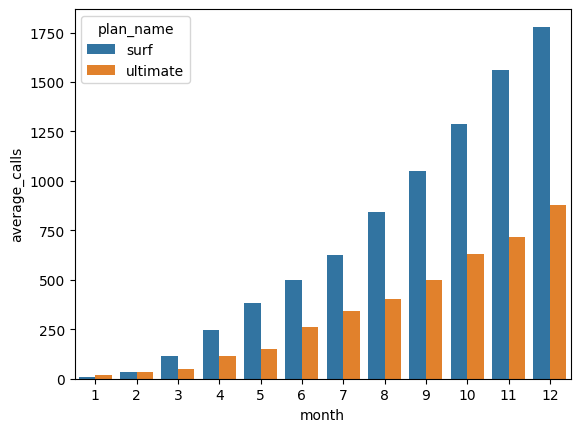

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes.
    #para ello necesito las columnas de plan_name, minutes_used y month
# Traza un gráfico de barras para visualizarla.

columns = ['month', 'plan_name']
df_used_minuts = df_used_minuts.groupby(columns)['average_call'].agg(['sum']).reset_index()
df_used_minuts = df_used_minuts.rename(columns={'sum': 'average_calls'})
df_used_minuts

import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(
    data=df_used_minuts,
    x="month",
    y="average_calls",
    hue="plan_name")

0        6.952381
2       32.890386
4      117.136896
6      244.489051
8      383.849484
10     498.307923
12     625.672254
14     845.163778
16    1048.777788
18    1287.366270
20    1562.467901
22    1779.554081
Name: average_calls, dtype: float64

1      16.938095
3      36.013163
5      47.576943
7     116.226771
9     149.569836
11    261.856750
13    343.662031
15    403.341145
17    500.037058
19    629.607752
21    714.631028
23    879.832653
Name: average_calls, dtype: float64


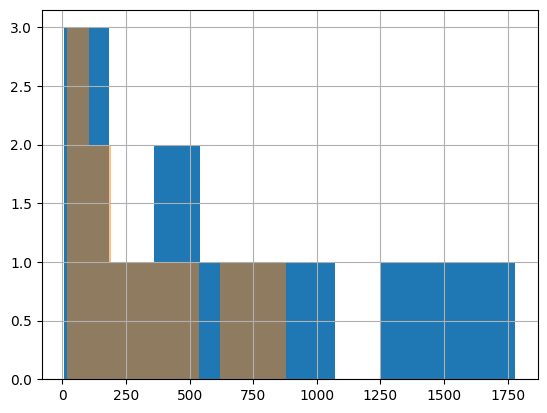

In [38]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_surf = df_used_minuts[df_used_minuts['plan_name']=='surf']['average_calls']
minutes_ultimate = df_used_minuts[df_used_minuts['plan_name']=='ultimate']['average_calls']

print(minutes_surf)
print()
print(minutes_ultimate)

minutes_surf.hist()
minutes_ultimate.hist(alpha=0.5)
plt.show()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [39]:
# Calcula la media, la varianza y la desviacion estandar de la duración mensual de llamadas.
import numpy as np
df_used_minuts
media_llamadas = df_used_minuts['average_calls'].mean() # calcula la media aquí
variance = np.var(df_used_minuts['average_calls']) # calcula la varianza aquí
standard_deviation = np.std(df_used_minuts['average_calls']) # calcula la desviacion standar aqui
print('La media de la duracion de llamadas es: ',media_llamadas)
print()
print('La desviacion standar de la duracion de llamadas es: ',standard_deviation)
print()
print('La varianza de la duracion de llamadas es: ',variance)

La media de la duracion de llamadas es:  522.163392399255

La desviacion standar de la duracion de llamadas es:  488.1098538882601

La varianza de la duracion de llamadas es:  238251.22946281862


<AxesSubplot:xlabel='average_calls'>

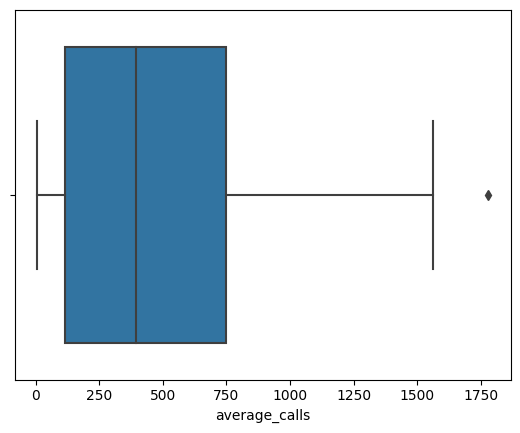

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(df_used_minuts['average_calls'])


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Si, el comportamiento de los clientes varia de acuerdo al plan, el plan Surf que es mas barato y con menor limite de llamadas incluido, genera un mayor indice de llamadas, incluso en tiempo, vs el plan Ultimate

### Mensajes

In [41]:
df_messags_sent = df_total_consumption.drop(['minutes_used','period_calls', 'mb_used', 'gbytes', 'messages_included', 
                                            'mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb',
                                            'usd_per_message','usd_per_minute','total_income'], axis=1)
df_messags_sent.head()

,user_id,month,messages_sent,plan_name
0,1000,12,11,ultimate
1,1006,11,15,ultimate
2,1006,12,139,ultimate
3,1008,10,21,ultimate
4,1008,11,37,ultimate


<AxesSubplot:xlabel='month', ylabel='messages_sent'>

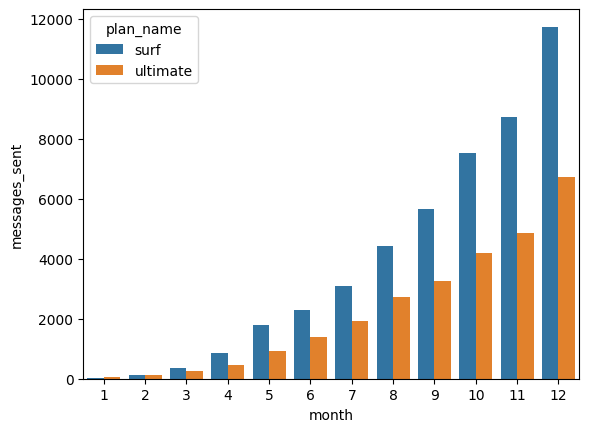

In [42]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Traza un gráfico de barras para visualizarla.
columns = ['month', 'plan_name']
df_messags_sent = df_messags_sent.groupby(columns)['messages_sent'].agg(['sum']).reset_index()
df_messags_sent = df_messags_sent.rename(columns={'sum': 'messages_sent'})
df_messags_sent.head()

import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(
    data=df_messags_sent,
    x="month",
    y="messages_sent",
    hue="plan_name")

0        21
2       108
4       351
6       864
8      1778
10     2292
12     3096
14     4439
16     5672
18     7507
20     8739
22    11731
Name: messages_sent, dtype: int64

1       62
3      139
5      243
7      463
9      931
11    1374
13    1937
15    2732
17    3259
19    4179
21    4861
23    6718
Name: messages_sent, dtype: int64


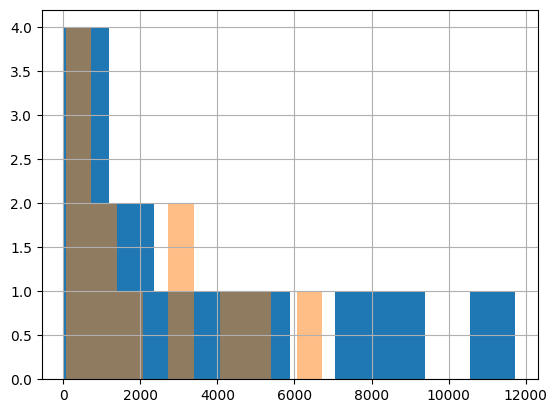

In [43]:
# Compara la cantidad de mensajes consumidos por usuarios por los ususrios por plan por mes. Traza un histograma
messages_surf = df_messags_sent[df_messags_sent['plan_name']=='surf']['messages_sent']
messages_ultimate = df_messags_sent[df_messags_sent['plan_name']=='ultimate']['messages_sent']

print(messages_surf)
print()
print(messages_ultimate)

messages_surf.hist()
messages_ultimate.hist(alpha=0.5)
plt.show()

La media de los mensajes enviados es:  3062.3333333333335

La desviacion standar de los mensajes enviados es:  3076.409780716621

La varianza de los mensajes enviados es:  9464297.138888886


<AxesSubplot:xlabel='messages_sent'>

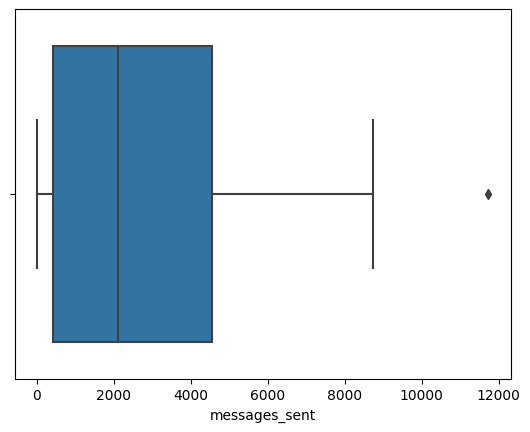

In [44]:
# Calcula la media, la varianza y la desviacion estandar de los mensajes enviados por mes. y traza un diagrama de caja para visualizar 
# la distribución de los mensajes enviados por mes
import numpy as np
df_messags_sent
media_llamadas = df_messags_sent['messages_sent'].mean() # calcula la media aquí
variance = np.var(df_messags_sent['messages_sent']) # calcula la varianza aquí
standard_deviation = np.std(df_messags_sent['messages_sent']) # calcula la desviacion standar aqui
print('La media de los mensajes enviados es: ',media_llamadas)
print()
print('La desviacion standar de los mensajes enviados es: ',standard_deviation)
print()
print('La varianza de los mensajes enviados es: ',variance)
sns.boxplot(df_messags_sent['messages_sent'])

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
Es sorprendente como los usuarios del plan surf continuan consumiendo mas que los usuarios del plan ultimate, al igual que en las llamadas, parece que el plan surf es el generador mas importante de ingresos para la compañia.

### Internet

In [45]:
df_used_mbyts =  df_total_consumption.drop(['minutes_used','period_calls', 'messages_sent', 'messages_included', 
                                            'mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb',
                                            'usd_per_message','usd_per_minute','total_income'], axis=1)
df_used_mbyts.head()

,user_id,month,mb_used,gbytes,plan_name
0,1000,12,1901.47,2,ultimate
1,1006,11,2068.37,3,ultimate
2,1006,12,32118.82,33,ultimate
3,1008,10,17106.99,18,ultimate
4,1008,11,23676.72,24,ultimate


<AxesSubplot:xlabel='month', ylabel='mb_used'>

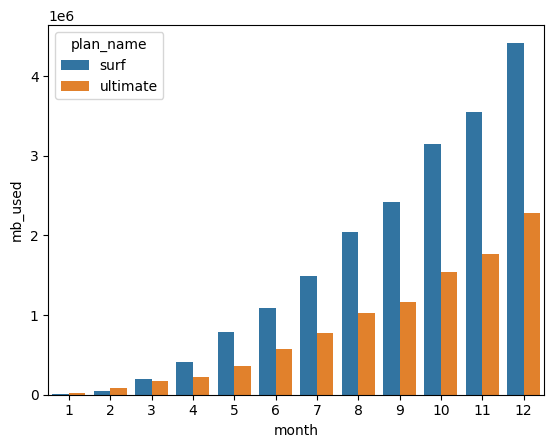

In [46]:
# Compara la cantidad de trafico de internet consumido por los usuraios por plan.
# Traza un gráfico de barras para visualizarla.

columns = ['month', 'plan_name']
df_used_mbyts = df_used_mbyts.groupby(columns)['mb_used'].agg(['sum']).reset_index()
df_used_mbyts = df_used_mbyts.rename(columns={'sum': 'mb_used'})
df_used_mbyts.head()

import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(
    data=df_used_mbyts,
    x="month",
    y="mb_used",
    hue="plan_name")

0        7894.79
2       46553.82
4      198357.48
6      414788.20
8      787125.24
10    1089602.03
12    1487064.36
14    2042246.69
16    2424433.25
18    3150526.25
20    3553434.74
22    4420214.74
Name: mb_used, dtype: float64

1       20859.60
3       86678.78
5      166850.06
7      228572.67
9      356864.13
11     571687.82
13     775468.24
15    1024688.05
17    1165149.16
19    1541075.29
21    1767022.06
23    2283410.73
Name: mb_used, dtype: float64


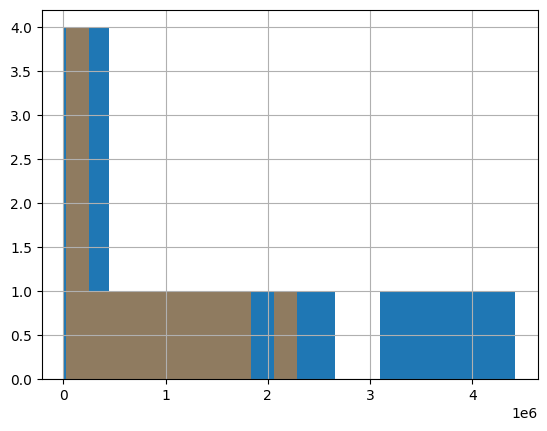

In [47]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan por mes. Traza un histograma.
mbytes_surf = df_used_mbyts[df_used_mbyts['plan_name']=='surf']['mb_used']
mbytes_ultimate = df_used_mbyts[df_used_mbyts['plan_name']=='ultimate']['mb_used']

print(mbytes_surf)
print()
print(mbytes_ultimate)

mbytes_surf.hist()
mbytes_ultimate.hist(alpha=0.5)
plt.show()

La media del trafico de internet es de:  1233773.6741666666 mbytes por mes

La desviacion standar del trafico de internet es:  1192005.840750595

La varianza del trafico de internet es de:  1420877924383.533


<AxesSubplot:xlabel='mb_used'>

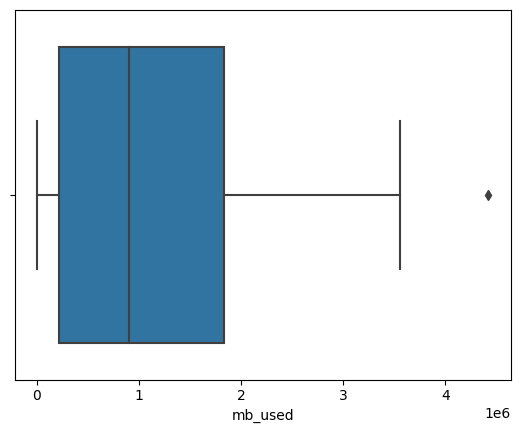

In [48]:
# Calcula la media, la varianza y la desviacion estandar del trafico por internet por plan, por mes. Traza un diagrama de caja para visualizar 
# la distribución del trafico por intenet por mes
import numpy as np
df_used_mbyts
media_trafico = df_used_mbyts['mb_used'].mean() # calcula la media aquí
variance = np.var(df_used_mbyts['mb_used']) # calcula la varianza aquí
standard_deviation = np.std(df_used_mbyts['mb_used']) # calcula la desviacion standar aqui
print('La media del trafico de internet es de: ',media_trafico, 'mbytes por mes')
print()
print('La desviacion standar del trafico de internet es: ',standard_deviation)
print()
print('La varianza del trafico de internet es de: ',variance)
sns.boxplot(df_used_mbyts['mb_used'])

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Eñ tercer dato de consumo de servicios, el trafico de internet nos confirma que los usuarios del plan Surf son los mayores consumidores de y geneneradores de ingresos para la compañia.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<AxesSubplot:xlabel='month', ylabel='total_income'>

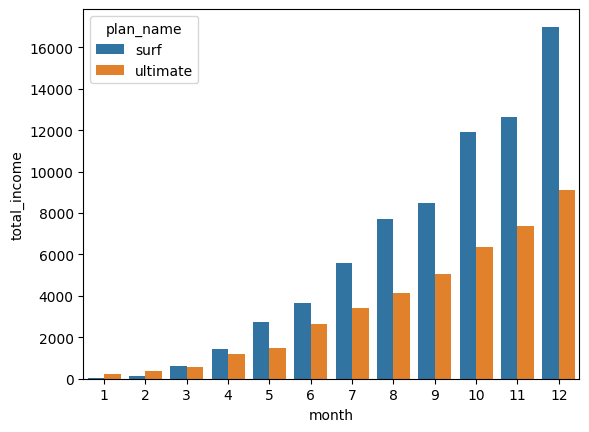

In [49]:
# Compara la generacion premedio de ingresos plan y por cada mes.
# Traza un gráfico de barras para visualizarla.
columns = ['month', 'plan_name']
df_incomes = df_total_consumption.groupby(columns)['total_income'].agg(['sum']).reset_index()
df_incomes = df_incomes.rename(columns={'sum': 'total_income'})
df_incomes.head()

import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(
    data=df_incomes,
    x="month",
    y="total_income",
    hue="plan_name")

0        20.00
2       125.97
4       617.85
6      1427.50
8      2736.23
10     3638.87
12     5579.97
14     7703.19
16     8467.54
18    11891.27
20    12658.62
22    16998.08
Name: total_income, dtype: float64

1      210.00
3      350.00
5      544.88
7     1170.96
9     1485.96
11    2663.92
13    3405.92
15    4135.88
17    5066.88
19    6356.84
21    7359.80
23    9110.64
Name: total_income, dtype: float64


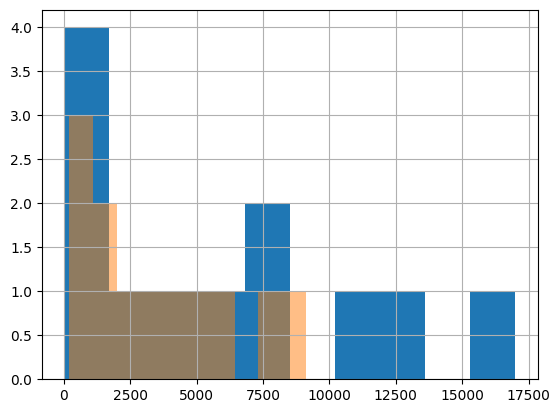

In [50]:
# Compara los ingresos generados por plan por mes. Traza un histograma.
income_surf = df_incomes[df_incomes['plan_name']=='surf']['total_income']
income_ultimate = df_incomes[df_incomes['plan_name']=='ultimate']['total_income']

print(income_surf)
print()
print(income_ultimate)

income_surf.hist()
income_ultimate.hist(alpha=0.5)
plt.show()

La media de los ingresos es de:  4738.615416666666

La desviacion standar de los ingresos es de:  4472.633807576338

La varianza de los ingresos es de:  20004453.176674813


<AxesSubplot:xlabel='total_income'>

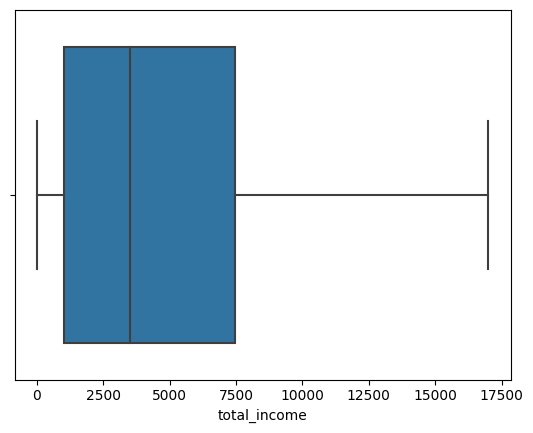

In [51]:
# Calcula la media, la varianza y la desviacion estandar de los ingresos por plan y por mes.
# Traza un diagrama de caja para visualizar 
import numpy as np
df_incomes
media_income = df_incomes['total_income'].mean() # calcula la media aquí
variance = np.var(df_incomes['total_income']) # calcula la varianza aquí
standard_deviation = np.std(df_incomes['total_income']) # calcula la desviacion standar aqui
print('La media de los ingresos es de: ',media_income)
print()
print('La desviacion standar de los ingresos es de: ',standard_deviation)
print()
print('La varianza de los ingresos es de: ',variance)
sns.boxplot(df_incomes['total_income'])

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
    Me parece que la razon principal de la diferencia de los ingresos por plan se debe al exceso de confianza por parte de los usuarios. Todo en base a la eleccion del plan que se adquiere, el usuario Surf elige el plan en base al costo creyendo que por ser mas barato sera suficiente para el, situacion que con el paso del tiempo entendera que no y al final muchos terminan pagando mas que por el plan ultimate. Por otro lado el usuario del plan ultimate puede ser un usuario mas analitico que conoce y cuida sus consumos, ya que es probable que haya pasado por una experiencia similar a lo que hoy nos muestran los ususarios del plan surf.


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Gran trabajo en esta sección! Has llevado a cabo un análisis estadístico completo del comportamiento del usuario segmentado por plan, incluyendo llamadas, mensajes, tráfico de internet e ingresos. Los cálculos de medidas de tendencia central y dispersión están correctamente implementados, y el uso de visualizaciones (barras, histogramas y boxplots) facilita la comparación entre los planes. También es destacable tu capacidad para interpretar los resultados y derivar hipótesis claras sobre el comportamiento del usuario, como el posible exceso de confianza en el plan Surf. Este tipo de análisis ofrece una base valiosa para decisiones estratégicas de marketing y diseño de planes.

Dos sugerencias para profundizar aún más:

* Considera normalizar el consumo y los ingresos por número de usuarios activos por plan y mes, lo que te permitiría evaluar de forma más justa la rentabilidad promedio por usuario.
* Sería útil calcular la proporción de usuarios que exceden los límites incluidos en cada plan, lo cual daría soporte numérico a tus conclusiones sobre la rentabilidad del plan Surf.

¡Has demostrado una excelente capacidad analítica y de comunicación de resultados! Sigue así.

</div> 


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [70]:
# Prueba las hipótesis
# Hipotesis nula: Para la compañia, los ingresos promedio de los planes Surf y Ultimate son iguales
# Hipotesis alternativa: Para la compañia, los ingresos promedio de los planes Surf y Ultimate son diferentes

from scipy import stats as st
import numpy as np

ingresos_surf = df_incomes[df_incomes['plan_name']=='surf']['total_income']
ingresos_ultimate = df_incomes[df_incomes['plan_name']=='ultimate']['total_income']

estadistico, pvalue = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)
alpha = 0.05

if pvalue < alpha:
    print('Se rechaza la hipotesis nula: los usuarios de los planes tienen promedios distintos')
elif pvalue >= alpha:
    print('No se puede rechazar la hipotesis nula: los usuarios de los planes tienen promedios iguales')

No se puede rechazar la hipotesis nula: los usuarios de los planes tienen promedios iguales


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [65]:
df_users_a = df_users[['user_id', 'city']]
df_consumptiom_ny_nj = pd.merge(df_total_consumption, df_users_a, on=['user_id'], how='left')
df_consumptiom_ny_nj = df_consumptiom_ny_nj.drop(['minutes_used','period_calls', 'mb_used', 'gbytes', 'messages_sent', 'messages_included', 
                                            'mb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb',
                                            'usd_per_message','usd_per_minute'], axis=1)
print(df_consumptiom_ny_nj['city'].unique()) #'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Birmingham-Hoover, AL MSA'
df_consumptiom_ny_nj.head()

['Atlanta-Sandy Springs-Roswell, GA MSA'
 'San Francisco-Oakland-Berkeley, CA MSA'
 'Orlando-Kissimmee-Sanford, FL MSA' 'Cleveland-Elyria, OH MSA'
 'Knoxville, TN MSA' 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Denver-Aurora-Lakewood, CO MSA'
 'Seattle-Tacoma-Bellevue, WA MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN MSA' 'Columbus, OH MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Columbia, SC MSA'
 'San Antonio-New Braunfels, TX MSA'
 'Charlotte-Concord-Gastonia, NC-SC MSA' 'Phoenix-Mesa-Chandler, AZ MSA'
 'Riverside-San Bernardino-Ontario, CA MSA'
 'Grand Rapids-Kentwood, MI MSA' 'New Haven-Milford, CT MSA'
 'Cincinnati, OH-KY-IN MSA'
 'Miami-Fort Lauderdale-West Palm Beach, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Sacramento–Roseville–Folsom, CA MSA'
 'Las Vegas-Henderson-Parad

,user_id,month,plan_name,total_income,city
0,1000,12,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1006,11,ultimate,70.00,"San Francisco-Oakland-Berkeley, CA MSA"
2,1006,12,ultimate,85.96,"San Francisco-Oakland-Berkeley, CA MSA"
3,1008,10,ultimate,70.00,"Orlando-Kissimmee-Sanford, FL MSA"
4,1008,11,ultimate,70.00,"Orlando-Kissimmee-Sanford, FL MSA"


In [69]:
# Prueba las hipótesis
# Prueba las hipótesis
# Hipotesis nula: Para la compañia, los ingresos promedio de los planes Surf y Ultimate son iguales
# Hipotesis alternativa: Para la compañia, los ingresos promedio de los planes Surf y Ultimate son diferentes

from scipy import stats as st
import numpy as np

ingresos_ny_nj_surf = df_consumptiom_ny_nj[(df_consumptiom_ny_nj['plan_name']=='surf') & (df_consumptiom_ny_nj['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]['total_income']
ingresos_ny_nj_ultimate = df_consumptiom_ny_nj[(df_consumptiom_ny_nj['plan_name']=='ultimate') & (df_consumptiom_ny_nj['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA')]['total_income']

estadistico, pvalue = st.ttest_ind(ingresos_ny_nj_surf, ingresos_ny_nj_ultimate, equal_var=False)
alpha = 0.05

if pvalue < alpha:
    print('Se rechaza la hipotesis nula: los usuarios de los planes tienen promedios distintos')
elif pvalue >= alpha:
    print('No se puede rechazar la hipotesis nula: los usuarios de los planes tienen promedios iguales')

Se rechaza la hipotesis nula: los usuarios de los planes tienen promedios distintos


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]
1. Es una costante que los usurios del plan surf tienen mayores consumos en todos los servicios, que los del plan ultimate 
2. Debido a ellos Los usuarios del plan sur generan mayores ingresos vs los del plan ultimate, de manera general, probablemente a nivel de estados o areas se puedan encontrar similitudes o diferencias, como lo vemos con el caso del area NY-NJ.
3. Debido a que debi comparar dos poblaciones distintas (2 paquetes de consumo diferentes) fue que elegi usar la Hipotesis sobre la igualdad de la media de 2 poblaciones



<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo en la formulación y prueba de hipótesis estadísticas. Has planteado correctamente las hipótesis nula y alternativa, elegido una prueba adecuada (`ttest_ind`) y aplicado correctamente el valor alfa. Muy bien por extender el análisis al comparar ingresos en una región específica como NY-NJ, lo que añade profundidad territorial a la evaluación. También es destacable que interpretes correctamente los resultados según el p-valor obtenido, lo que demuestra un sólido razonamiento estadístico. Además, tus conclusiones generales están bien conectadas con los hallazgos previos sobre consumo e ingresos por plan.

Dos consejos para seguir fortaleciendo tus habilidades analíticas:

* Siempre verifica el valor del p-valor, **aunque el resultado del `if` lo interprete por ti**, ya que te permite entender la magnitud de la diferencia y si está cerca del umbral.
* Muy bien por identificar la ciudad correctamente como filtro en la segunda hipótesis; para futuros proyectos, podrías automatizar este tipo de pruebas para todas las regiones clave con más de cieto número de usuarios.

¡Muy sólido tu enfoque de análisis, interpretación y comunicación! 🔍📈

</div>

